In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [3]:
# Use the UCI Wine Quality dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
df = pd.read_csv(url, sep=';')


In [4]:
# Display the first few rows of the dataset
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
X = df.drop('quality', axis=1)
y = df['quality']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [15]:
# Coefficient of Determination (R²)
r_squared = model.score(X_test, y_test)
print(f'Coefficient of Determination (R²): {r_squared:.3f}')

# Intercept
intercept = model.intercept_
print(f'Intercept: {intercept:.3f}')

# Coefficients
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
print('\nCoefficients:')
print(coefficients)


Coefficient of Determination (R²): 0.265
Intercept: 124.394

Coefficients:
                Variable  Coefficient
0          fixed acidity     0.045907
1       volatile acidity    -1.914884
2            citric acid    -0.061303
3         residual sugar     0.071240
4              chlorides    -0.026475
5    free sulfur dioxide     0.005119
6   total sulfur dioxide    -0.000242
7                density  -124.264125
8                     pH     0.600700
9              sulphates     0.649073
10               alcohol     0.229009


In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5690247717229278


In [13]:
# Display coefficients and intercept
coefficients = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})
intercept = model.intercept_

print('Intercept:', intercept)
print('\nCoefficients:')
print(coefficients)


Intercept: 124.39391498452068

Coefficients:
                Variable  Coefficient
0          fixed acidity     0.045907
1       volatile acidity    -1.914884
2            citric acid    -0.061303
3         residual sugar     0.071240
4              chlorides    -0.026475
5    free sulfur dioxide     0.005119
6   total sulfur dioxide    -0.000242
7                density  -124.264125
8                     pH     0.600700
9              sulphates     0.649073
10               alcohol     0.229009


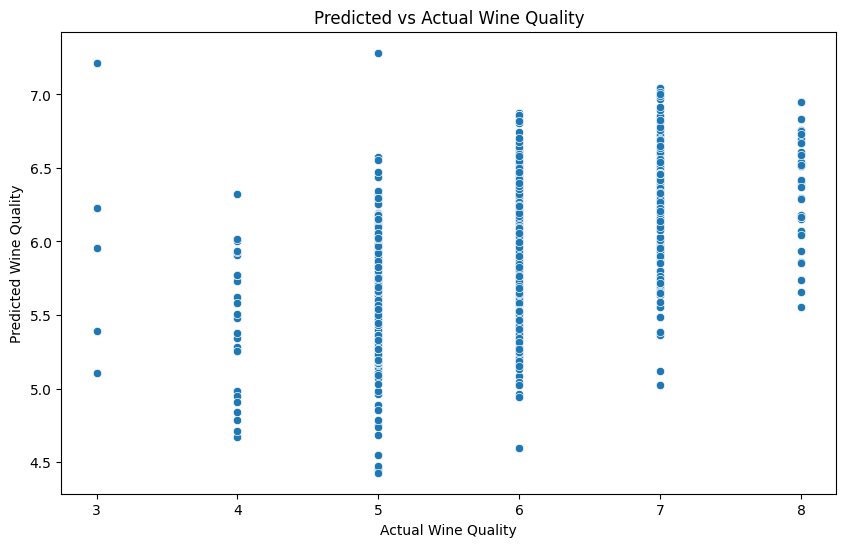

In [14]:
import seaborn as sns

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.title('Predicted vs Actual Wine Quality')
plt.xlabel('Actual Wine Quality')
plt.ylabel('Predicted Wine Quality')
plt.show()


### THE SAME WITH R LIBRARIES

In [3]:
library("readr")


In [4]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"
wine_data <- read.csv(url, sep=";")


In [5]:
head(wine_data)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


In [7]:
split_index <- sample(1:nrow(wine_data), 0.8 * nrow(wine_data))
train_data <- wine_data[split_index, ]
test_data <- wine_data[-split_index, ]

In [8]:
model <- lm(quality ~ ., data = train_data)

In [10]:
predictions <- predict(model, newdata = test_data)


In [11]:
mse <- mean((test_data$quality - predictions)^2)
cat('Mean Squared Error:', mse, '\n')

Mean Squared Error: 0.5870554 


In [12]:
mse <- mean((test_data$quality - predictions)^2)
cat('Mean Squared Error:', mse, '\n')

Mean Squared Error: 0.5870554 


In [13]:
intercept <- coef(model)[1]
cat('Intercept:', intercept, '\n')

Intercept: 224.5701 


In [14]:
coefficients <- coef(model)[-1]  # Exclude intercept
coefficient_names <- names(coefficients)
coefficients_df <- data.frame(Variable = coefficient_names, Coefficient = coefficients)
cat('\nCoefficients:\n')
print(coefficients_df)


Coefficients:
                                 Variable   Coefficient
fixed.acidity               fixed.acidity  1.283551e-01
volatile.acidity         volatile.acidity -1.855481e+00
citric.acid                   citric.acid  5.527418e-02
residual.sugar             residual.sugar  1.036039e-01
chlorides                       chlorides -1.837064e-02
free.sulfur.dioxide   free.sulfur.dioxide  3.708343e-03
total.sulfur.dioxide total.sulfur.dioxide -5.795889e-05
density                           density -2.254036e+02
pH                                     pH  8.810915e-01
sulphates                       sulphates  7.074332e-01
alcohol                           alcohol  1.008097e-01


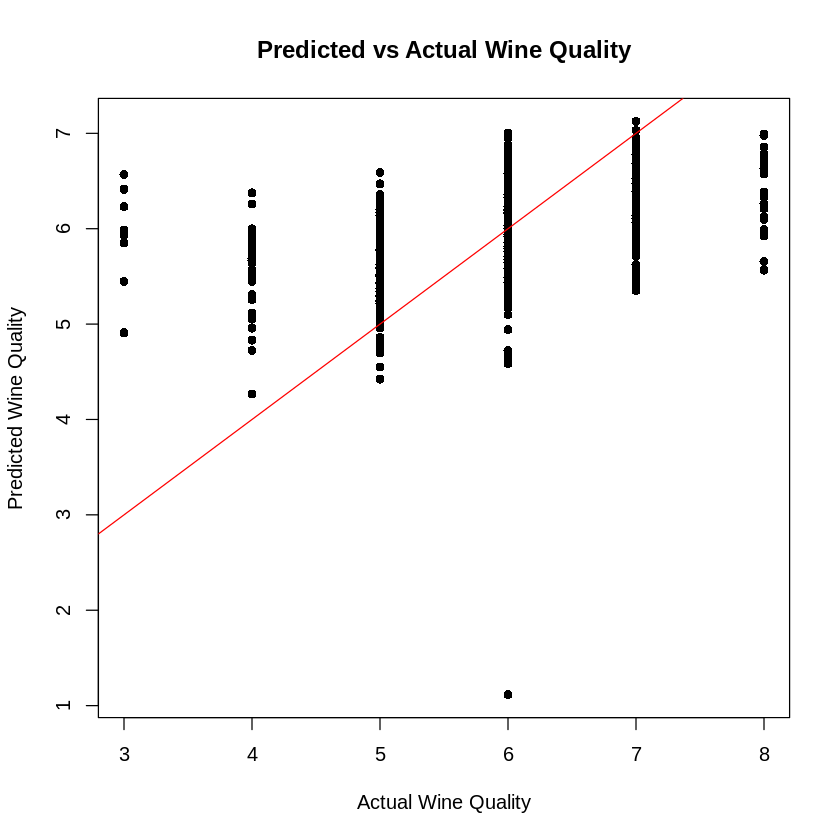

In [15]:
plot(test_data$quality, predictions, main = "Predicted vs Actual Wine Quality",
     xlab = "Actual Wine Quality", ylab = "Predicted Wine Quality", pch = 16)
abline(0, 1, col = "red")  # Add a diagonal line for reference